In [286]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns



In [359]:
vueltas = pd.read_csv("../dataset_todos_pilotos/final/laps_spain_final_v2.csv")


In [360]:
vueltas['makeStop'] = vueltas['makeStop'].shift(1)   
vueltas['makeStop'][0] = 0

/var/folders/pd/wpkltt694qx207z03w_cmlbh0000gn/T/ipykernel_64737/1494221414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vueltas['makeStop'][0] = 0


In [361]:
vueltas[0:30]

,LapTime,LapNumber,TyreLife,FreshTyre,TrackStatus,Stint,Piloto,makeStop,AirTemp,Rainfall,...,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,anyo,nextPit,compound_HARD,compound_MEDIUM,compound_SOFT,compound_SUPERSOFT
0,132.826,3.0,4.0,0,4,1.0,hamilton,0.0,16.3,1,...,1.0,134.646,133.906,1.0,2018,25.0,0,0,1,0
1,128.778,4.0,5.0,0,4,1.0,hamilton,0.0,15.9,1,...,1.0,133.632,128.681,1.0,2018,25.0,0,0,1,0
2,130.044,5.0,6.0,0,4,1.0,hamilton,0.0,16.1,1,...,1.0,127.041,129.827,1.0,2018,25.0,0,0,1,0
3,133.088,6.0,7.0,0,4,1.0,hamilton,0.0,16.7,0,...,1.0,119.521,133.232,1.0,2018,25.0,0,0,1,0
4,82.099,7.0,8.0,0,1,1.0,hamilton,0.0,16.4,0,...,1.0,90.479,83.604,1.0,2018,25.0,0,0,1,0
5,81.631,8.0,9.0,0,1,1.0,hamilton,0.0,16.3,0,...,1.0,86.554,82.259,1.0,2018,25.0,0,0,1,0
6,81.386,9.0,10.0,0,1,1.0,hamilton,0.0,16.3,1,...,1.0,85.665,82.475,1.0,2018,25.0,0,0,1,0
7,81.079,10.0,11.0,0,1,1.0,hamilton,0.0,16.2,1,...,1.0,85.523,82.536,1.0,2018,25.0,0,0,1,0
8,81.808,11.0,12.0,0,1,1.0,hamilton,0.0,16.4,1,...,1.0,85.151,82.003,1.0,2018,25.0,0,0,1,0
9,81.081,12.0,13.0,0,1,1.0,hamilton,0.0,16.6,1,...,1.0,84.969,82.875,1.0,2018,25.0,0,0,1,0


In [337]:
columnas = ["Stint", "Piloto", 'anyo', 'makeStop']
vueltas = vueltas[columnas]

In [362]:

#vueltas = vueltas.drop(['Piloto'], axis = 1)

vueltas_train = vueltas[vueltas['anyo'].isin([2018, 2019, 2020])]
vueltas_validation = vueltas[vueltas['anyo'].isin([2021])]
vueltas_test = vueltas[vueltas['anyo'] == 2022]

vueltas_train = vueltas_train[vueltas_train['Piloto'] == "max_verstappen"]
vueltas_validation = vueltas_validation[vueltas_validation['Piloto'] == "max_verstappen"]
vueltas_test = vueltas_test[vueltas_test['Piloto'] == "max_verstappen"]

#vueltas_train = vueltas_train.drop(['anyo'], axis=1)
vueltas_validation = vueltas_validation.drop(['anyo'], axis=1)

vueltas_test = vueltas_test.drop(['anyo'], axis=1)
vueltas_train.drop(['Piloto'], axis = 1, inplace = True)
vueltas_test.drop(['Piloto'], axis = 1, inplace = True)
vueltas_validation.drop(['Piloto'], axis = 1, inplace = True)
vueltas_train = vueltas_train.drop(['Stint'], axis=1)
vueltas_validation = vueltas_validation.drop(['Stint'], axis=1)
vueltas_test = vueltas_test.drop(['Stint'], axis=1)

vueltas_train = vueltas_train.astype('float')
vueltas_validation = vueltas_validation.astype(float)
vueltas_test = vueltas_test.astype(float)

In [363]:
vueltas_train_18 = vueltas_train[vueltas_train['anyo'] == 2018]

vueltas_train_18 = vueltas_train_18.drop('anyo', axis=1)
vueltas_train_18['makeStop'] = vueltas_train_18['makeStop'].astype('int32')
scaler = MinMaxScaler()
scaler.fit(vueltas_train_18)
vueltas_train_scaler_18= scaler.transform(vueltas_train_18)

In [364]:
vueltas_train_19 = vueltas_train[vueltas_train['anyo'] == 2019]

vueltas_train_19 = vueltas_train_19.drop('anyo', axis=1)
vueltas_train_19['makeStop'] = vueltas_train_19['makeStop'].astype('int32')

scaler.fit(vueltas_train_19)
vueltas_train_scaler_19= scaler.transform(vueltas_train_19)

In [365]:
vueltas_train_20 = vueltas_train[vueltas_train['anyo'] == 2020]

vueltas_train_20 = vueltas_train_20.drop('anyo', axis=1)
vueltas_train_20['makeStop'] = vueltas_train_20['makeStop'].astype('int32')

scaler.fit(vueltas_train_20)
vueltas_train_scaler_20= scaler.transform(vueltas_train_20)

In [366]:
vueltas_test_scaler = scaler.transform(vueltas_test)
vueltas_validation_scaler = scaler.transform(vueltas_validation)


In [367]:
trainX = []
trainY = []
testX = []
testY = []
validationX = []
validationY = []
loopback = 8 # Esto es el numero de muestras que usara en el pasado 
future = 1 # Esto es el numero de hechos futuros que usará como salida a las 10 muestras del pasado

for i in range (loopback, len(vueltas_train_scaler_18) -future +1):
    trainX.append(vueltas_train_scaler_18[i-loopback:i, 0:vueltas_train_18.shape[1]])
    trainY.append(vueltas_train_scaler_18[i + future - 1:i + future,5])
    
for i in range (loopback, len(vueltas_train_scaler_19) -future +1):
    trainX.append(vueltas_train_scaler_19[i-loopback:i, 0:vueltas_train_19.shape[1]])
    trainY.append(vueltas_train_scaler_19[i + future - 1:i + future,5])
    
for i in range (loopback, len(vueltas_train_scaler_20) -future +1):
    trainX.append(vueltas_train_scaler_20[i-loopback:i, 0:vueltas_train_20.shape[1]])
    trainY.append(vueltas_train_scaler_20[i + future - 1:i + future,5])
 
for i in range (loopback, len(vueltas_test_scaler) -future +1):
        testX.append(vueltas_test_scaler[i-loopback:i, 0:vueltas_test.shape[1]])
        testY.append(vueltas_test_scaler[i + future - 1:i + future,5])
        
    
for i in range (loopback, len(vueltas_validation_scaler) -future +1):
    validationX.append(vueltas_validation_scaler[i-loopback:i, 0:vueltas_validation.shape[1]])
    validationY.append(vueltas_validation_scaler[i + future - 1:i + future,5])

In [368]:
trainX, trainY, testX, testY, validationX, validationY = np.array(trainX), np.array(trainY), np.array(testX), np.array(testY), np.array(validationX), np.array(validationY)

In [369]:
vueltas_train_19

,LapTime,LapNumber,TyreLife,FreshTyre,TrackStatus,makeStop,AirTemp,Rainfall,Humidity,TrackTemp,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,nextPit,compound_HARD,compound_MEDIUM,compound_SOFT,compound_SUPERSOFT
1040,83.595,2.0,5.0,0.0,1.0,0,19.8,0.0,59.0,42.0,3.0,83.495,83.893,4.0,20.0,0.0,0.0,1.0,0.0
1041,83.359,3.0,6.0,0.0,1.0,0,19.8,0.0,58.1,41.8,3.0,83.021,83.455,4.0,20.0,0.0,0.0,1.0,0.0
1042,83.097,4.0,7.0,0.0,1.0,0,19.8,0.0,57.5,41.8,3.0,83.161,83.378,4.0,20.0,0.0,0.0,1.0,0.0
1043,82.803,5.0,8.0,0.0,1.0,0,19.5,0.0,60.5,41.3,3.0,82.676,83.232,4.0,20.0,0.0,0.0,1.0,0.0
1044,82.817,6.0,9.0,0.0,1.0,0,19.7,0.0,59.6,41.3,3.0,82.536,83.146,4.0,20.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,80.033,61.0,18.0,1.0,1.0,0,20.3,0.0,50.1,39.2,3.0,79.864,80.144,4.0,66.0,0.0,1.0,0.0,0.0
1100,79.988,62.0,19.0,1.0,1.0,0,20.1,0.0,51.3,39.2,3.0,79.903,80.007,4.0,66.0,0.0,1.0,0.0,0.0
1101,80.287,63.0,20.0,1.0,1.0,0,20.2,0.0,51.4,39.1,3.0,80.151,80.472,4.0,66.0,0.0,1.0,0.0,0.0
1102,79.993,64.0,21.0,1.0,1.0,0,20.4,0.0,50.8,39.1,3.0,79.912,79.082,4.0,66.0,0.0,1.0,0.0,0.0


In [370]:
trainX.shape[0]

167

In [371]:
trainX.shape

(167, 8, 19)

In [372]:
model = Sequential()
model.add(LSTM(256, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss= "binary_crossentropy") ##Cambiar esto para la siguiente reunion (positivo 1, negativo 0)
model.summary()

2023-07-26 01:11:34.543079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-26 01:11:34.544261: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-26 01:11:34.545822: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 8, 256)            282624    
                                                                 
 dropout_22 (Dropout)        (None, 8, 256)            0         
                                                                 
 lstm_23 (LSTM)              (None, 128)               197120    
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 479,873
Trainable params: 479,873
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15


2023-07-26 01:11:35.189593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-26 01:11:35.191403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-26 01:11:35.192607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 3s 38ms/step - loss: 0.5750
Epoch 2/15
3/3 [==============================] - 0s 39ms/step - loss: 0.2597
Epoch 3/15
3/3 [==============================] - 0s 35ms/step - loss: 0.1231
Epoch 4/15
3/3 [==============================] - 0s 46ms/step - loss: 0.1511
Epoch 5/15
3/3 [==============================] - 0s 40ms/step - loss: 0.1630
Epoch 6/15
3/3 [==============================] - 0s 37ms/step - loss: 0.1409
Epoch 7/15
3/3 [==============================] - 0s 35ms/step - loss: 0.1294
Epoch 8/15
3/3 [==============================] - 0s 35ms/step - loss: 0.1300
Epoch 9/15
3/3 [==============================] - 0s 44ms/step - loss: 0.1336
Epoch 10/15
3/3 [==============================] - 0s 43ms/step - loss: 0.1239
Epoch 11/15
3/3 [==============================] - 0s 35ms/step - loss: 0.1305
Epoch 12/15
3/3 [==============================] - 0s 35ms/step - loss: 0.1250
Epoch 13/15
3/3 [==============================] - 0s 35ms/step - loss: 

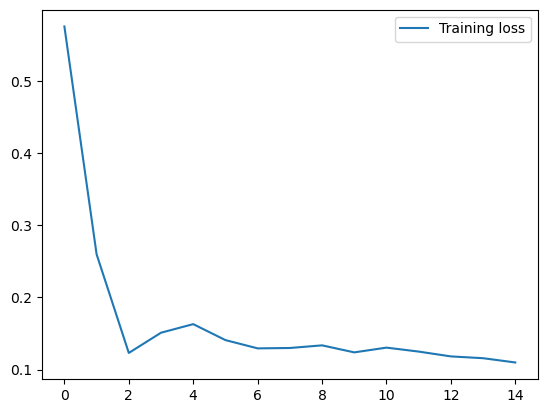

In [373]:
history = model.fit(trainX, trainY, epochs=15, batch_size=64, validation_split=0.0, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.legend()

In [374]:
predictions = model.predict(testX)

2023-07-26 01:11:43.384401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-26 01:11:43.385533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-26 01:11:43.387604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 2s 9ms/step


In [375]:
predictions

array([[0.6414881 ],
       [0.61960465],
       [0.5838232 ],
       [0.54048926],
       [0.4786902 ],
       [0.3654813 ],
       [0.20598619],
       [0.10277395],
       [0.07645472],
       [0.06084943],
       [0.03692248],
       [0.02324251],
       [0.02056743],
       [0.04438341],
       [0.06008171],
       [0.07947838],
       [0.10813195],
       [0.11683103],
       [0.11937712],
       [0.12249784],
       [0.11847307],
       [0.11353564],
       [0.11158793],
       [0.11175997],
       [0.11143004],
       [0.11129477],
       [0.08118295],
       [0.08253808],
       [0.1435537 ],
       [0.204295  ],
       [0.24211009],
       [0.29703262],
       [0.37561288],
       [0.47415322],
       [0.5969076 ],
       [0.64053214],
       [0.68137056],
       [0.6562511 ],
       [0.59722775],
       [0.51942474],
       [0.42257962],
       [0.3147574 ],
       [0.21343979],
       [0.15238933],
       [0.2284445 ],
       [0.26978898],
       [0.3153086 ],
       [0.369

In [376]:
predictions[predictions>0.5] =1.0

In [377]:
predictions[predictions<=0.5] = 0.0

In [378]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [379]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
metricas = classification_report(testY, predictions)
print(metricas)


              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89        53
         1.0       0.10      0.33      0.15         3

    accuracy                           0.80        56
   macro avg       0.53      0.58      0.52        56
weighted avg       0.91      0.80      0.85        56



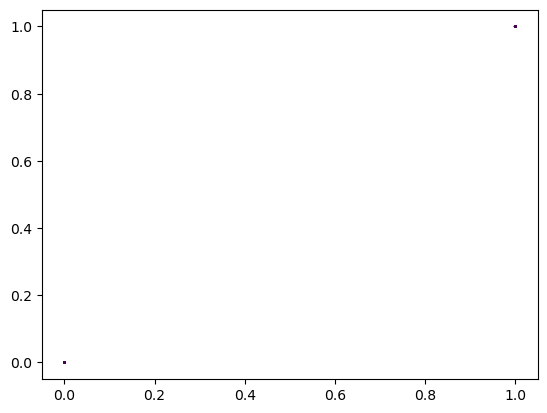

In [129]:
plt.scatter(predictions[:,0], predictions[:,0], s=1, c=testY+1)

In [418]:
def calculate_accuracy_within_range(real_values, predicted_values, within_range=3):
    # Convertimos las matrices a listas de 1s y 0s
    real_values = np.ravel(real_values).astype(int)
    predicted_values = np.ravel(predicted_values).astype(int)

    # Encontrar índices donde se hizo una parada
    stop_indexes = np.where(real_values == 1)[0]

    # Contador de aciertos
    correct_predictions = 0

    # Verificar si las predicciones coinciden dentro del rango de vueltas
    for stop_index in stop_indexes:
        start_index = max(0, stop_index - within_range + 1)
        end_index = min(len(predicted_values), stop_index + within_range)

        if 1 in predicted_values[start_index:end_index + 1]:
            correct_predictions += 1

    # Calcular la precisión considerando solo las predicciones correctas dentro del rango
    accuracy = correct_predictions / len(stop_indexes) if len(stop_indexes) > 0 else 0

    return accuracy


In [419]:
accuracy = calculate_accuracy_within_range(testY, predictions, within_range=1)

print(f"Exactitud dentro del rango de vueltas: {accuracy:.2f}")

Exactitud dentro del rango de vueltas: 0.33


In [420]:
precision = accuracy  # En este caso, la precisión es igual a la exactitud dentro del rango
recall = 1.0  # Recall es 1.0, ya que solo estamos considerando las paradas reales dentro del rango
f1_score = 2 * (precision * recall) / (precision + recall)  # Calculamos el F1-score

print(f"Precisión: {precision:.2f}")
print(f"F1-score: {f1_score:.2f}")

Precisión: 0.33
F1-score: 0.50


In [130]:
clases = np.unique(validationY[:,0]) 
clases

array([0., 1.])

In [131]:
f = lambda x: np.argwhere(x == clases)
f = np.vectorize(f)
y_real = f(validationY[:,0])

In [132]:
validationY[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.])

In [133]:
y_real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [134]:
#AQUI ES CON LOS DATOS DE VALIDADACION
predictions = model.predict(validationX)

2/2 [==============================] - 0s 9ms/step


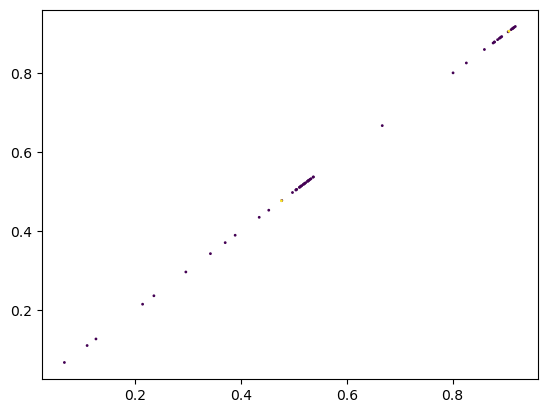

In [135]:
plt.scatter(predictions[:,0], predictions[:,0], s=1, c=y_real+1)

In [136]:
y_real_train = f(trainY[:,0])

In [137]:
y_real_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [138]:
predictions_test = model.predict(testX)

2/2 [==============================] - 0s 8ms/step


In [139]:
y_real_test =  f(testY[:,0])

In [394]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(predictions, y_real, test_size=0.3, stratify=y_real)

In [140]:
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression(random_state=0, penalty=None).fit(predictions, y_real) # Esto es de validacion

In [141]:
pred_test_2 = rl.predict(predictions_test)

In [142]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_real_test, pred_test_2)
metricas = classification_report(y_real_test, pred_test_2)

/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
pred_test_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [143]:
print(cm)
print(metricas)

[[53  0]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       0.00      0.00      0.00         3

    accuracy                           0.95        56
   macro avg       0.47      0.50      0.49        56
weighted avg       0.90      0.95      0.92        56



In [201]:
nombre_archivo = "ejecuciones/ejecuciones_val_2021/saudi_arabia.txt"

# Abrir el archivo en modo de escritura
with open(nombre_archivo, "w") as archivo:
    print("Matriz de confusión:", file=archivo)
    print(clases, file=archivo)
    print(cm, file=archivo)
    print("Métricas:", file=archivo)
    print(metricas, file=archivo)

In [399]:

real = f(testY[:,0])
predicho = pred_test_2

In [400]:
real

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [401]:
predicho

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [402]:

indice_cambio_original = np.where(real[:-1] != real[1:])[0]

# Encontrar el índice del cambio en la matriz predicha
indice_cambio_predicha = np.where(predicho[:-1] != predicho[1:])[0]

# Calcular la precisión en el cambio
precision_cambio = np.sum(indice_cambio_original == indice_cambio_predicha) / len(indice_cambio_original)

print("Precisión en el cambio:", precision_cambio)

Precisión en el cambio: 0.0
